# **1. Data Collection**

**1.1 Importing File Formats**

In [1]:
import pandas as pd

# Importing CSV file
df = pd.read_csv('/kaggle/input/ai-generated-art-trends/ai_generated_art_trends_2024.csv')

**1.21 Checking Data Types**

In [2]:
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 Artwork_ID           object
Artist_Name          object
Art_Style            object
Creation_Date        object
Medium               object
Tools_Used           object
Popularity_Score    float64
Region               object
Art_Genre            object
Platform             object
Description          object
Image_URL            object
dtype: object


**1.22 Checking Duplicates**

In [3]:
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


# **2. Data Exploration**

**2.1 Understanding the Structure**

**2.11 View the First Few Rows**

In [4]:
df.head()

,Artwork_ID,Artist_Name,Art_Style,Creation_Date,Medium,Tools_Used,Popularity_Score,Region,Art_Genre,Platform,Description,Image_URL
0,ART-00001,DALL-E,Conceptual,2023-03-11,Collage,GANPaint,1604.25,South America,Urban,Instagram,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00001.jpg
1,ART-00002,AbstractoBot,Futurism,2022-11-27,Oil Paint,MidJourney,4162.12,North America,Abstract,Dribbble,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00002.jpg
2,ART-00003,Vincent,Futurism,2024-03-13,Charcoal,GANPaint,2989.38,Europe,Mythology,Reddit,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00003.jpg
3,ART-00004,ArtBreeder,Impressionism,2022-09-12,Pencil Sketch,ArtBreeder,2985.97,Europe,Still Life,Tumblr,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00004.jpg
4,ART-00005,DALL-E,Surrealism,2022-12-05,Collage,DeepDream,2035.18,Asia,Conceptual,DeviantArt,A mesmerizing piece of art that blends traditi...,https://example.com/artwork/00005.jpg


**2.12 View DataFrame Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artwork_ID        10000 non-null  object 
 1   Artist_Name       10000 non-null  object 
 2   Art_Style         10000 non-null  object 
 3   Creation_Date     10000 non-null  object 
 4   Medium            10000 non-null  object 
 5   Tools_Used        10000 non-null  object 
 6   Popularity_Score  10000 non-null  float64
 7   Region            10000 non-null  object 
 8   Art_Genre         10000 non-null  object 
 9   Platform          10000 non-null  object 
 10  Description       10000 non-null  object 
 11  Image_URL         10000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 937.6+ KB


**2.13 Summary Statistics**

In [6]:
df.describe()

,Popularity_Score
count,10000.000000
mean,2508.190738
std,1430.922879
min,50.850000
25%,1267.712500
50%,2492.025000
75%,3763.245000
max,4999.620000


**2.14 View Column Names**

In [7]:
print("Column Names:", df.columns.tolist())

Column Names: ['Artwork_ID', 'Artist_Name', 'Art_Style', 'Creation_Date', 'Medium', 'Tools_Used', 'Popularity_Score', 'Region', 'Art_Genre', 'Platform', 'Description', 'Image_URL']


**2.15 Shape of the Data**

In [8]:
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (10000, 12)


**2.16 View a Desired Sample of 5 Rows**

In [9]:
print(df.sample(5))

     Artwork_ID    Artist_Name   Art_Style Creation_Date       Medium  \
5499  ART-05500  NeoSurrealist     Realism    2024-05-10  Mixed Media   
8144  ART-08145       GANPaint  Conceptual    2023-05-06     Charcoal   
6488  ART-06489  NeoSurrealist     Pop Art    2023-12-26      Digital   
1578  ART-01579        MonaBot     Pop Art    2023-06-14     Charcoal   
2074  ART-02075       GANPaint  Conceptual    2023-07-13     3D Model   

      Tools_Used  Popularity_Score         Region   Art_Genre   Platform  \
5499   DeepDream            230.38         Europe  Still Life    Behance   
8144      DALL-E            650.59  South America      Sci-Fi  Pinterest   
6488  MidJourney           2209.94  North America    Portrait    Behance   
1578      DALL-E           3563.87  North America    Portrait     Reddit   
2074    GANPaint           4050.65           Asia      Nature  Instagram   

                                            Description  \
5499  A mesmerizing piece of art that blends 

**2.2 Missing Values**

**2.21 Identifying Missing Values**

In [10]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Artwork_ID          0
Artist_Name         0
Art_Style           0
Creation_Date       0
Medium              0
Tools_Used          0
Popularity_Score    0
Region              0
Art_Genre           0
Platform            0
Description         0
Image_URL           0
dtype: int64


**2.22 Dropping Rows or Columns with Missing Values**

In [11]:
# Drop rows with any missing values
df_cleaned_rows = df.dropna()

# Drop columns with any missing values
df_cleaned_columns = df.dropna(axis=1)

# **3. Data Cleaning**

**3.1 Identifying Outliers using Z-Score**

In [12]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers:\n", df_outliers)

Outliers:
 Empty DataFrame
Columns: [Artwork_ID, Artist_Name, Art_Style, Creation_Date, Medium, Tools_Used, Popularity_Score, Region, Art_Genre, Platform, Description, Image_URL]
Index: []


**3.2 Remove Outliers**

In [13]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# **Analyzing the Results**

**Distribution of Popularity Scores**

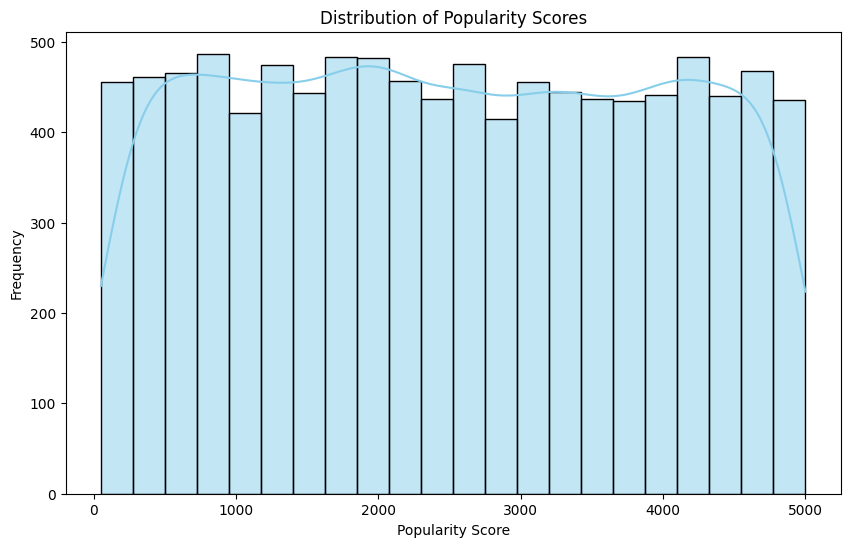

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Histogram of Popularity Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['Popularity_Score'], kde=True, color='skyblue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

**Art Style by Region**

In [15]:
import plotly.express as px

# Bar plot showing count of Art Styles by Region
fig = px.bar(df_no_outliers, x='Region', color='Art_Style', 
             title="Art Style Distribution by Region",
             labels={'count': 'Count'})
fig.show()

**Medium vs. Popularity Score**

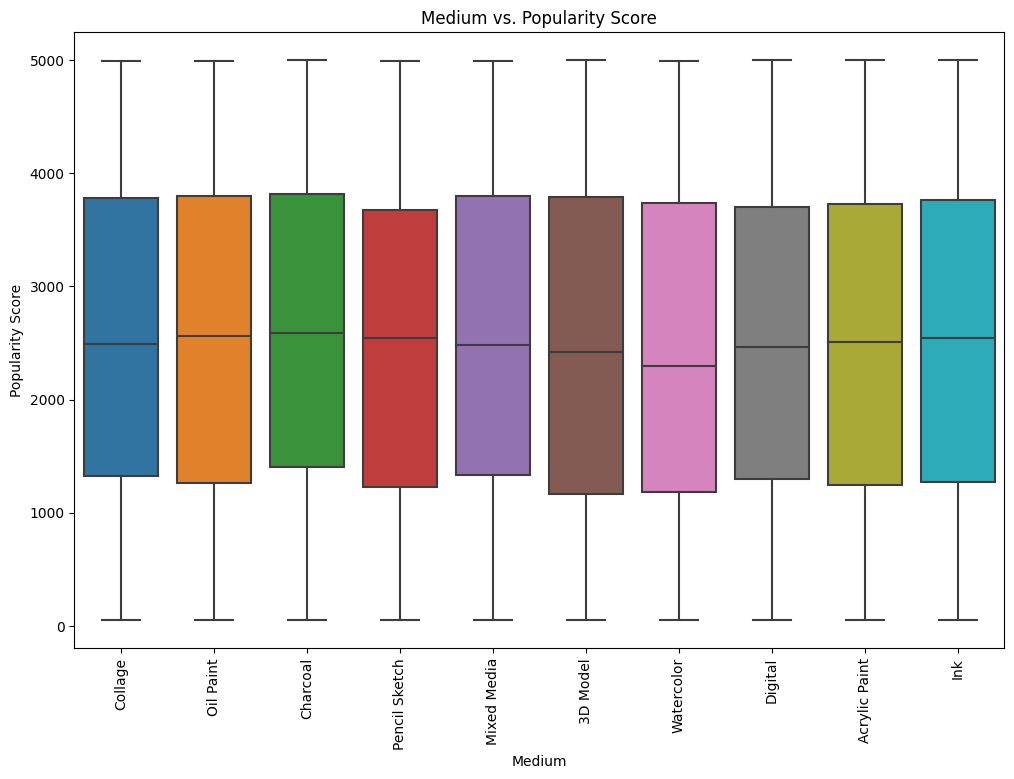

In [16]:
# Box plot to show the relationship between Medium and Popularity Score
plt.figure(figsize=(12, 8))
sns.boxplot(x='Medium', y='Popularity_Score', data=df_no_outliers)
plt.xticks(rotation=90)
plt.title('Medium vs. Popularity Score')
plt.xlabel('Medium')
plt.ylabel('Popularity Score')
plt.show()

**How is Popularity Score Distributed Across Different Art Genres?**

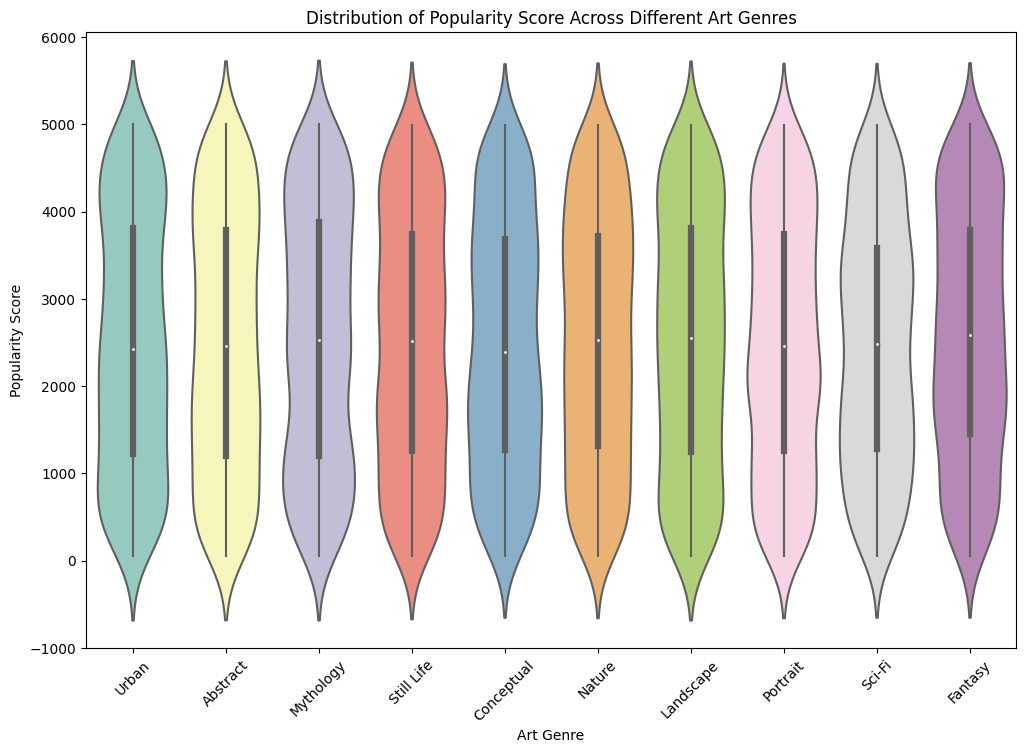

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot to visualize the distribution of Popularity Scores across Art Genres
plt.figure(figsize=(12, 8))
sns.violinplot(x='Art_Genre', y='Popularity_Score', data=df_no_outliers, palette='Set3')
plt.title('Distribution of Popularity Score Across Different Art Genres')
plt.xlabel('Art Genre')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()

**Which Platforms Are Most Popular for AI-Generated Art?**

In [18]:
import plotly.express as px

# Bar plot showing the count of AI-generated artworks by Platform
platform_count = df_no_outliers['Platform'].value_counts()

fig = px.bar(platform_count, x=platform_count.index, y=platform_count.values, 
             title="Most Popular Platforms for AI-Generated Art",
             labels={'x': 'Platform', 'y': 'Number of Artworks'})
fig.show()

**Which Art Styles Are Most Common in Each Region?**

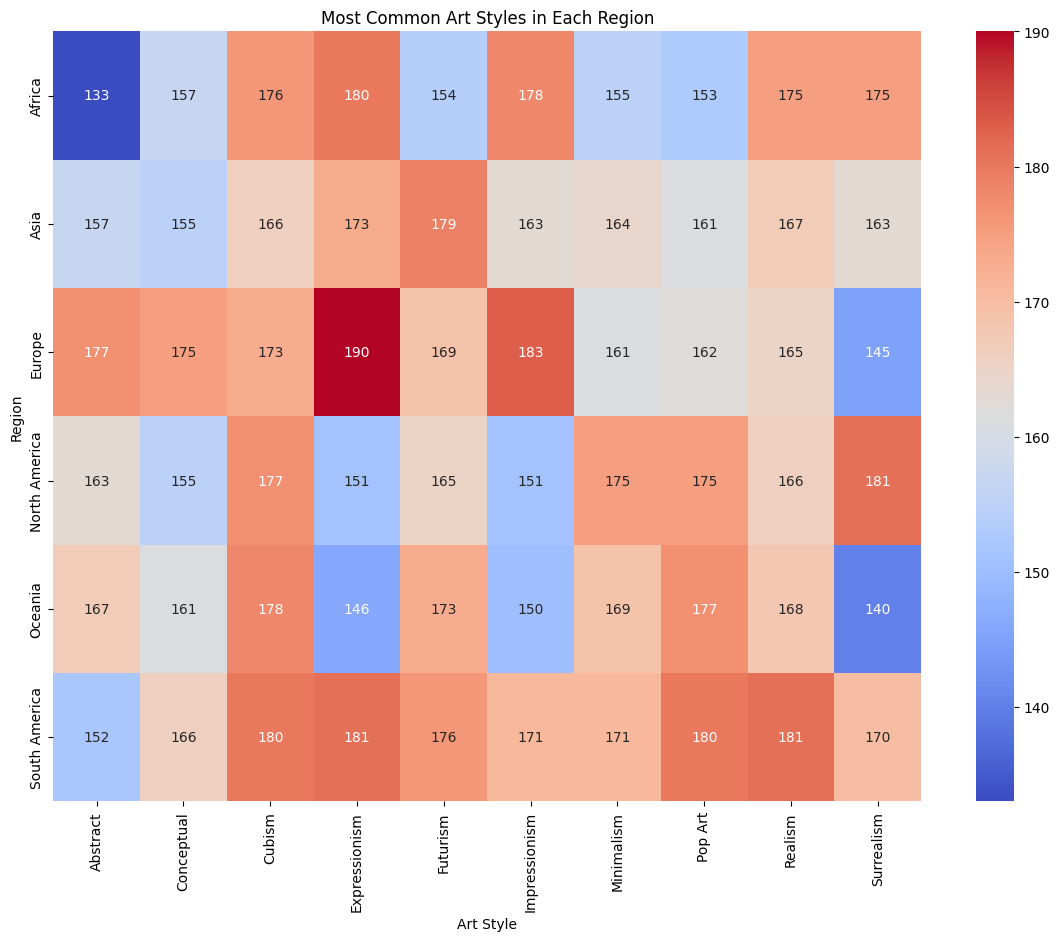

In [19]:
# Grouping data by Region and Art Style
art_style_region = df_no_outliers.groupby(['Region', 'Art_Style']).size().unstack().fillna(0)

# Heatmap to visualize the commonality of Art Styles in each Region
plt.figure(figsize=(14, 10))
sns.heatmap(art_style_region, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Most Common Art Styles in Each Region')
plt.xlabel('Art Style')
plt.ylabel('Region')
plt.show()

**What Tools Are Frequently Used in Different Mediums?**

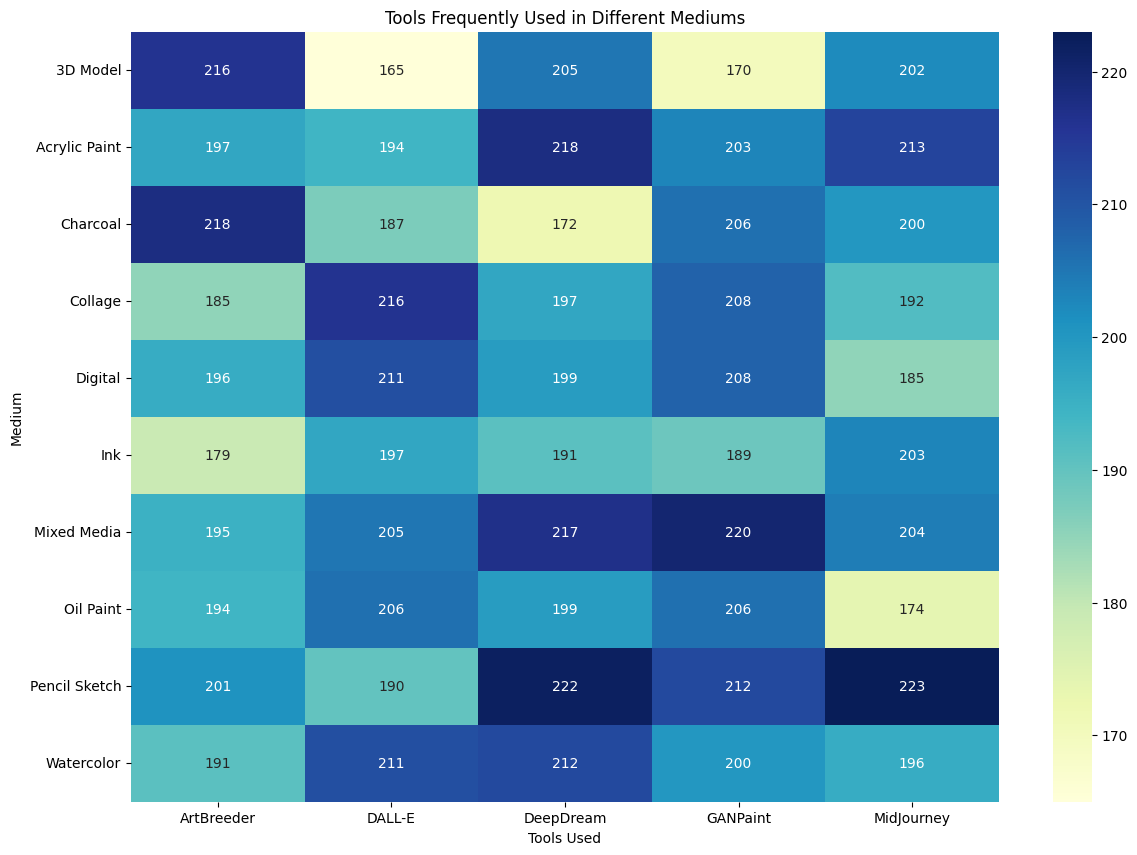

In [20]:
# Grouping data by Medium and Tools_Used
tools_medium = df_no_outliers.groupby(['Medium', 'Tools_Used']).size().unstack().fillna(0)

# Heatmap to visualize the frequency of Tools Used in different Mediums
plt.figure(figsize=(14, 10))
sns.heatmap(tools_medium, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Tools Frequently Used in Different Mediums')
plt.xlabel('Tools Used')
plt.ylabel('Medium')
plt.show()

**How Has AI-Generated Art Evolved Over Time?**

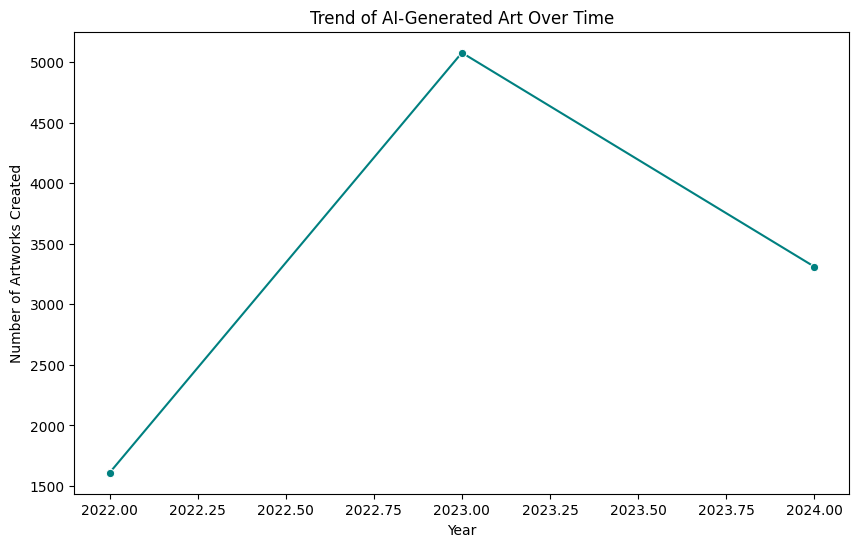

In [21]:
# Line plot showing the trend of AI-generated art creation over time
df_no_outliers['Creation_Year'] = pd.to_datetime(df_no_outliers['Creation_Date']).dt.year
creation_trend = df_no_outliers.groupby('Creation_Year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=creation_trend.index, y=creation_trend.values, marker='o', color='teal')
plt.title('Trend of AI-Generated Art Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Artworks Created')
plt.show()

**Which Artists Have the Highest Popularity Scores?**

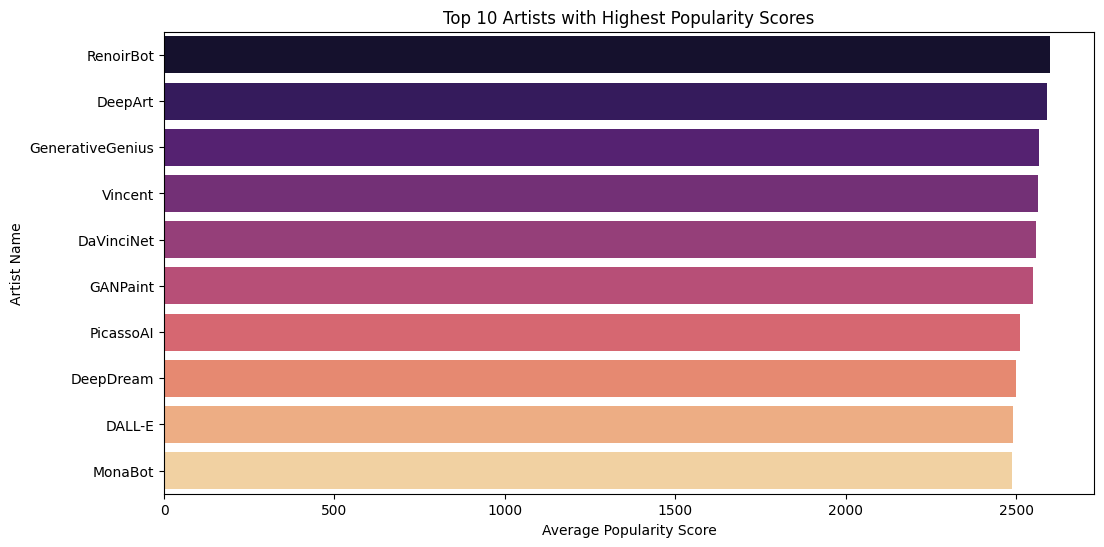

In [22]:
# Bar plot showing the top 10 artists with the highest average popularity scores
top_artists = df_no_outliers.groupby('Artist_Name')['Popularity_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Artists with Highest Popularity Scores')
plt.xlabel('Average Popularity Score')
plt.ylabel('Artist Name')
plt.show()

**Are Certain Art Styles More Popular on Specific Platforms?**

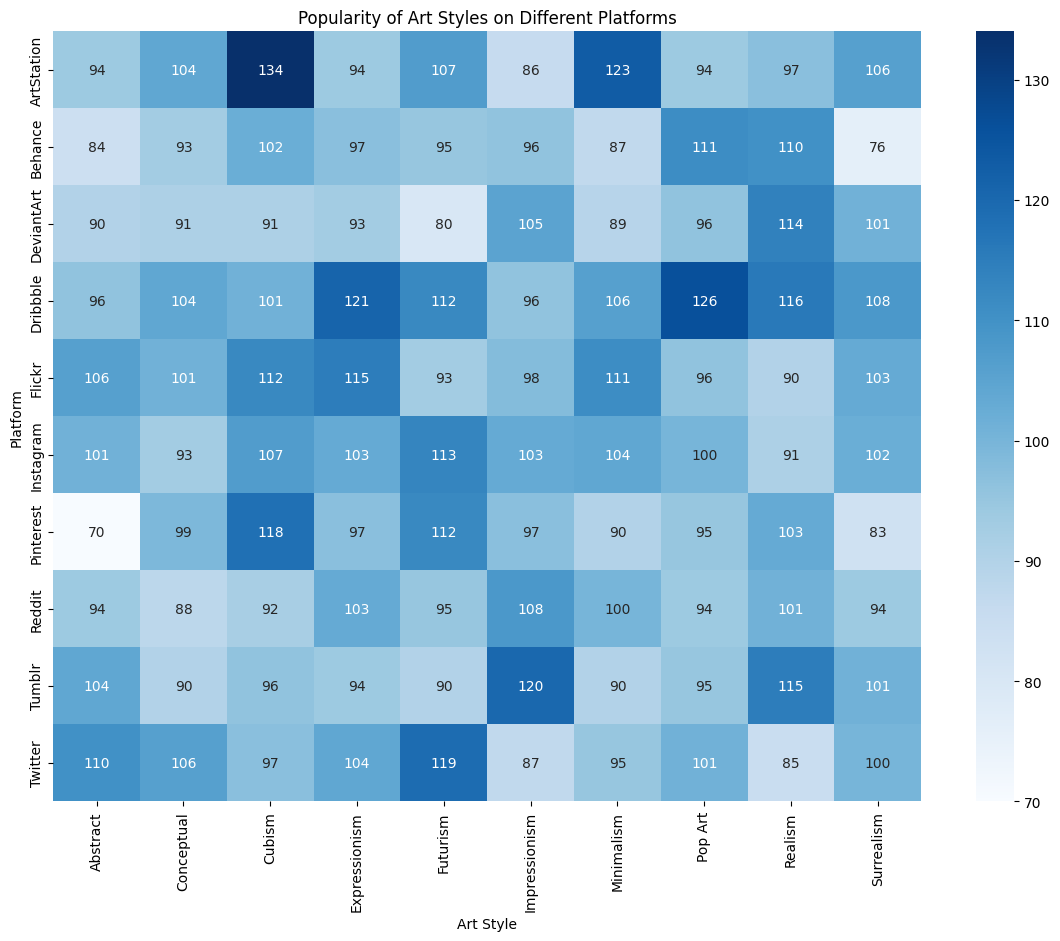

In [23]:
# Grouping data by Platform and Art Style
platform_art_style = df_no_outliers.groupby(['Platform', 'Art_Style']).size().unstack().fillna(0)

# Heatmap to visualize the popularity of Art Styles on different Platforms
plt.figure(figsize=(14, 10))
sns.heatmap(platform_art_style, cmap='Blues', annot=True, fmt='.0f')
plt.title('Popularity of Art Styles on Different Platforms')
plt.xlabel('Art Style')
plt.ylabel('Platform')
plt.show()

**Is There a Correlation Between Popularity Score and Creation Date?**

In [24]:
import numpy as np
from scipy.stats import pearsonr

# Calculate correlation between Popularity Score and Creation Year
df_no_outliers['Creation_Year'] = pd.to_datetime(df_no_outliers['Creation_Date']).dt.year
correlation, p_value = pearsonr(df_no_outliers['Popularity_Score'], df_no_outliers['Creation_Year'])

print(f"Correlation between Popularity Score and Creation Date: {correlation:.2f}")
print(f"P-Value: {p_value:.2f}")

Correlation between Popularity Score and Creation Date: 0.00
P-Value: 0.81


**How Does the Popularity of Different Art Genres Vary by Region?**

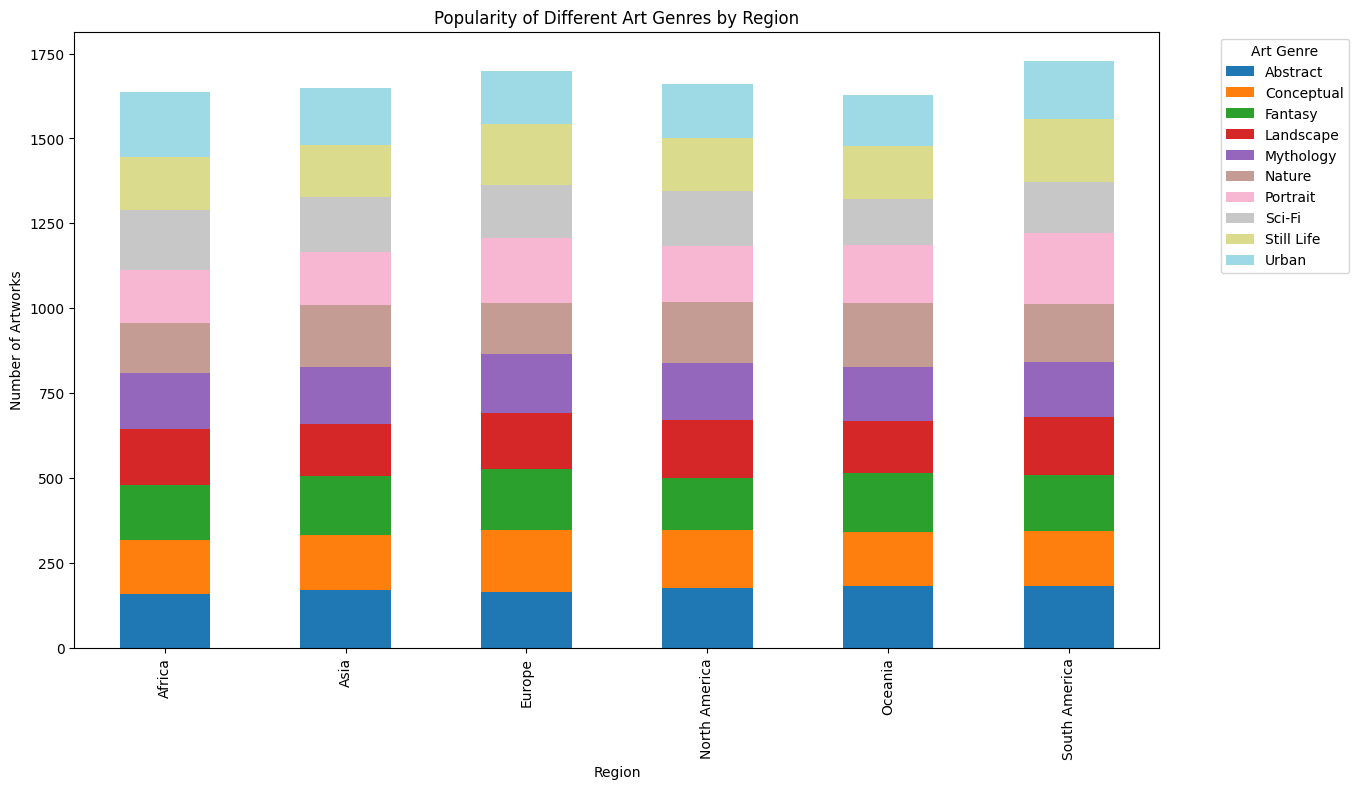

In [25]:
# Grouping data by Region and Art Genre
genre_region = df_no_outliers.groupby(['Region', 'Art_Genre']).size().unstack().fillna(0)

# Stacked bar plot to visualize the popularity of different Art Genres by Region
genre_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Popularity of Different Art Genres by Region')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.legend(title='Art Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**How is the Distribution of Artworks Across Different Mediums?**

In [26]:
import plotly.express as px

# Pie chart showing the distribution of artworks across different mediums
fig = px.pie(df_no_outliers, names='Medium', 
             title="Distribution of Artworks Across Different Mediums",
             hole=0.4)
fig.show()

**How Many Artworks Have Been Created Over Time in Each Region?**

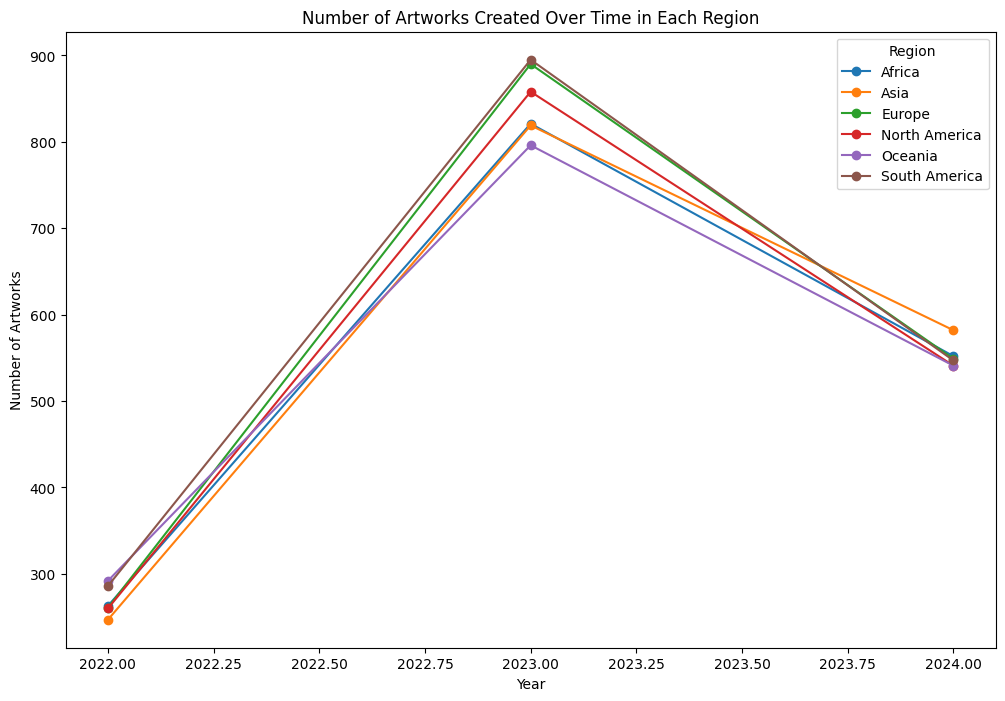

In [27]:
# Grouping data by Creation Year and Region
region_time_series = df_no_outliers.groupby(['Creation_Year', 'Region']).size().unstack().fillna(0)

# Line plot showing the trend of artworks created over time in each region
region_time_series.plot(figsize=(12, 8), marker='o')
plt.title('Number of Artworks Created Over Time in Each Region')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.legend(title='Region')
plt.show()

**What are the Most Common Art Styles Used by Popular Artists?**

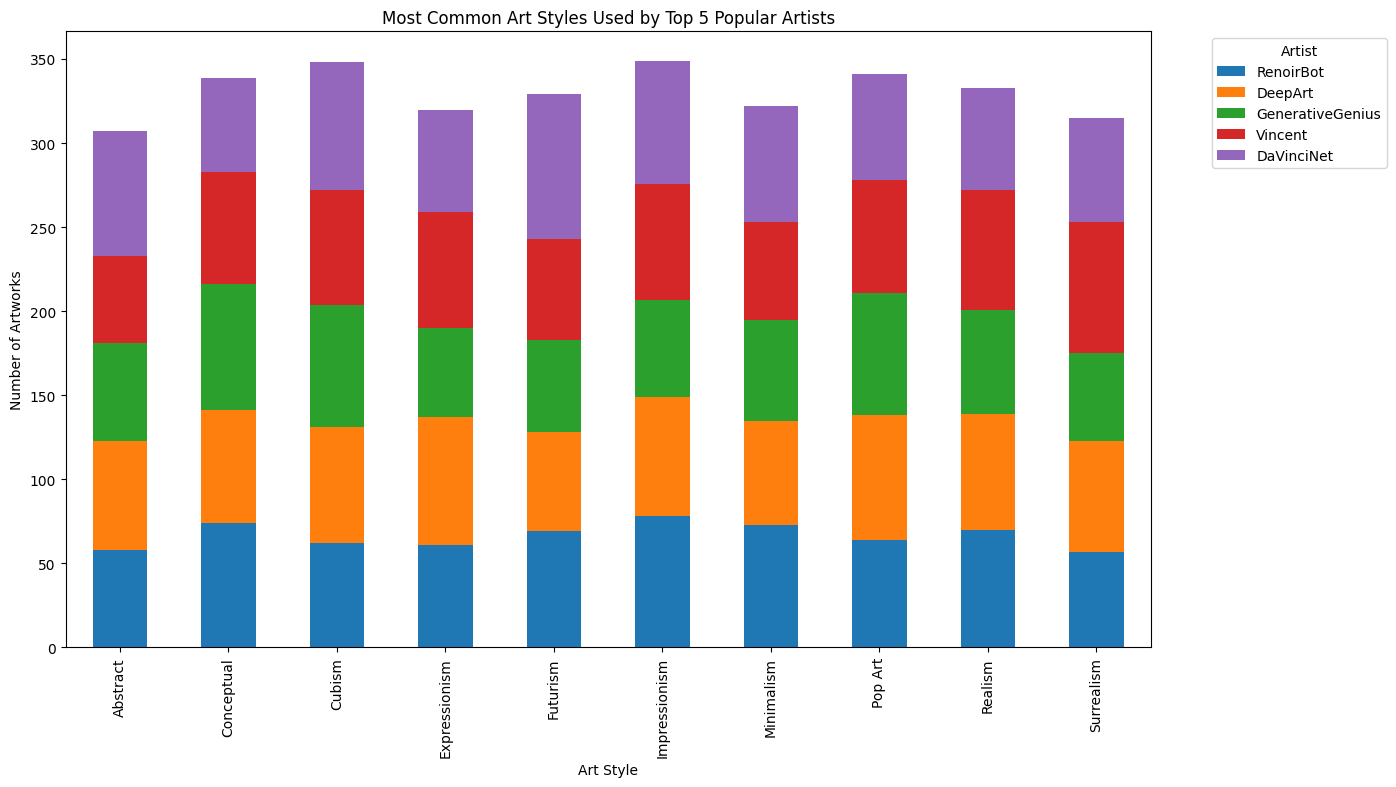

In [28]:
# Grouping data by Artist and Art Style
popular_artists_styles = df_no_outliers.groupby(['Artist_Name', 'Art_Style']).size().unstack().fillna(0)

# Bar plot showing the most common art styles used by the top 5 popular artists
top_5_artists = df_no_outliers.groupby('Artist_Name')['Popularity_Score'].mean().sort_values(ascending=False).head(5).index
popular_artists_styles.loc[top_5_artists].T.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Most Common Art Styles Used by Top 5 Popular Artists')
plt.xlabel('Art Style')
plt.ylabel('Number of Artworks')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**What is the Relationship Between Tools Used and Art Styles?**

In [29]:
import plotly.express as px

# Sunburst plot showing the relationship between Tools Used and Art Styles
fig = px.sunburst(df_no_outliers, path=['Tools_Used', 'Art_Style'], 
                  title="Relationship Between Tools Used and Art Styles",
                  maxdepth=2)
fig.show()

**Which Regions Prefer Certain Art Genres?**

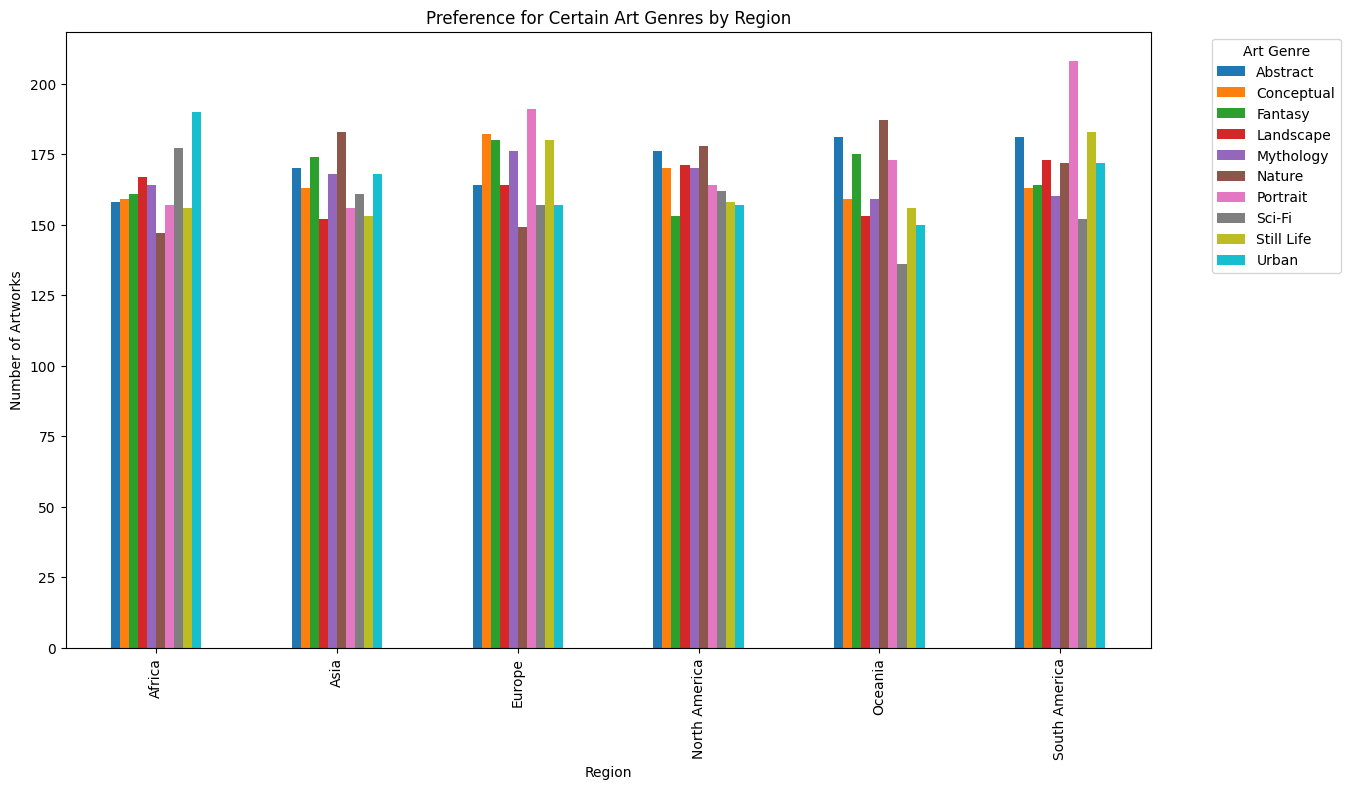

In [30]:
# Grouping data by Region and Art Genre
region_genre = df_no_outliers.groupby(['Region', 'Art_Genre']).size().unstack().fillna(0)

# Grouped bar plot showing the preference for certain Art Genres in different regions
region_genre.plot(kind='bar', figsize=(14, 8))
plt.title('Preference for Certain Art Genres by Region')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.legend(title='Art Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**How are Popularity Scores Distributed Among Different Artists?**

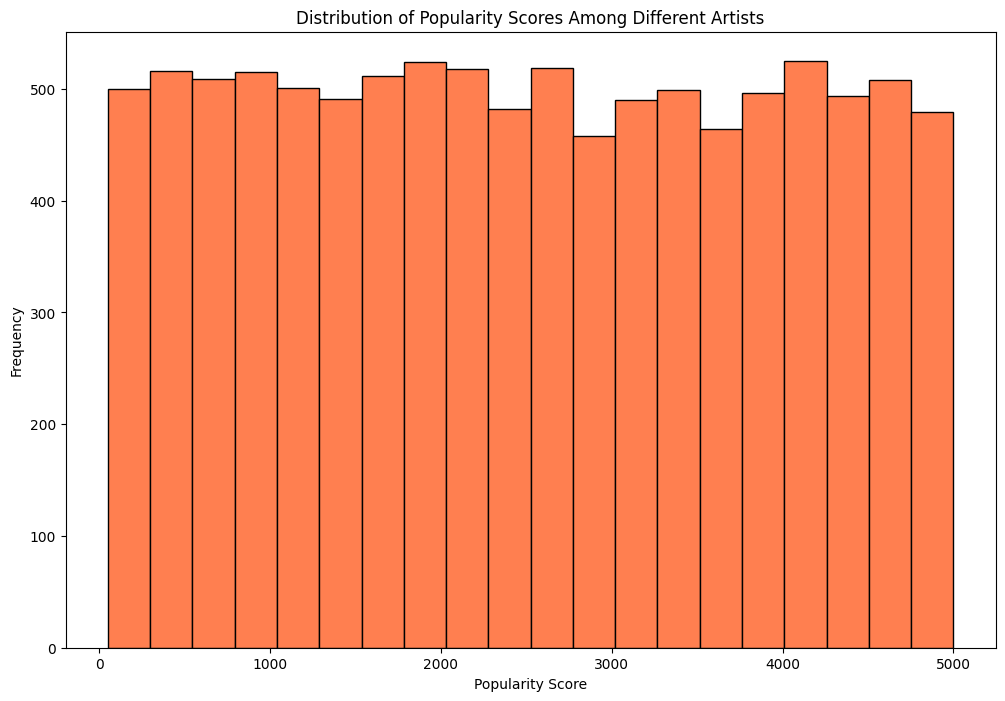

In [31]:
# Histogram showing the distribution of Popularity Scores among different artists
plt.figure(figsize=(12, 8))
df_no_outliers['Popularity_Score'].plot(kind='hist', bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Popularity Scores Among Different Artists')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

**What are the Most Popular Platforms for Each Art Genre?**

In [32]:
import plotly.express as px

# Grouping data by Platform and Art Genre
platform_genre = df_no_outliers.groupby(['Platform', 'Art_Genre']).size().reset_index(name='Count')

# Treemap showing the popularity of different platforms for each Art Genre
fig = px.treemap(platform_genre, path=['Art_Genre', 'Platform'], values='Count', 
                 title="Most Popular Platforms for Each Art Genre")
fig.show()

**How Does the Use of Tools Vary Across Different Regions?**

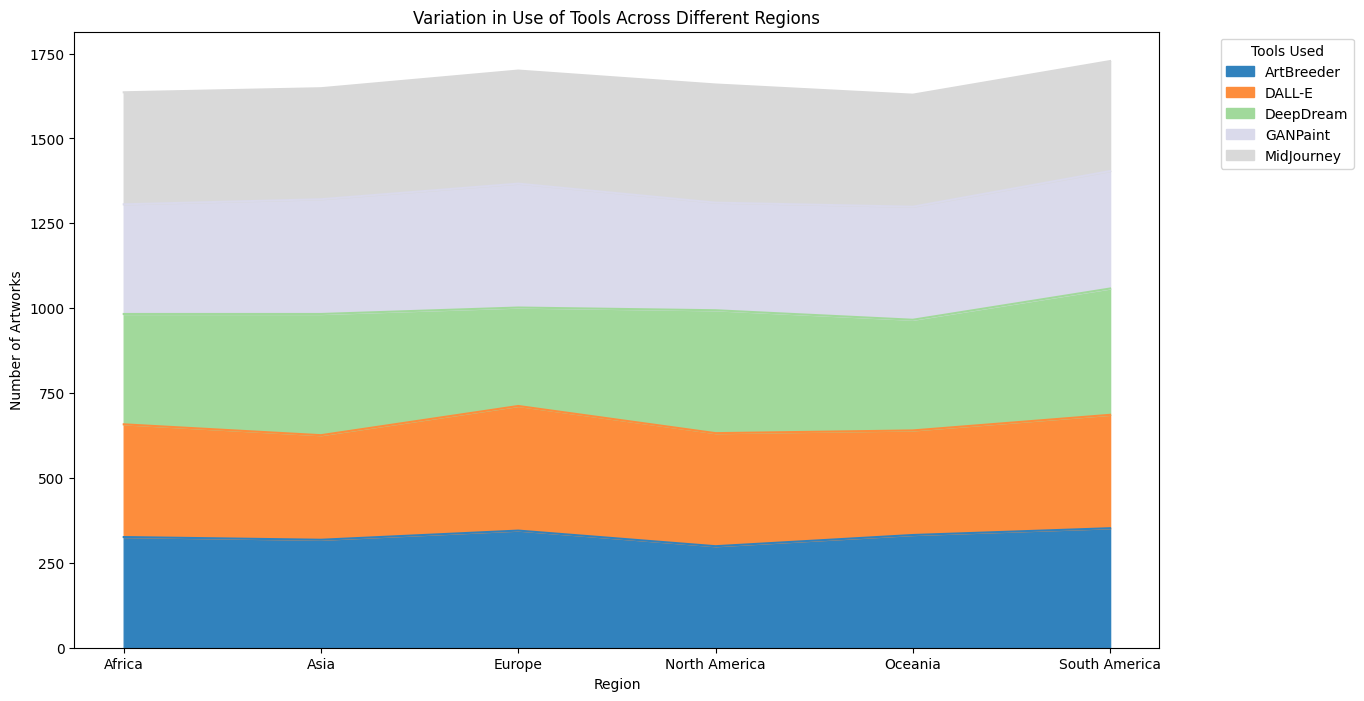

In [33]:
# Grouping data by Region and Tools_Used
tools_region = df_no_outliers.groupby(['Region', 'Tools_Used']).size().unstack().fillna(0)

# Stacked area plot showing the variation in the use of tools across different regions
tools_region.plot(kind='area', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Variation in Use of Tools Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.legend(title='Tools Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**What is the Relationship Between Medium and Popularity Score?**

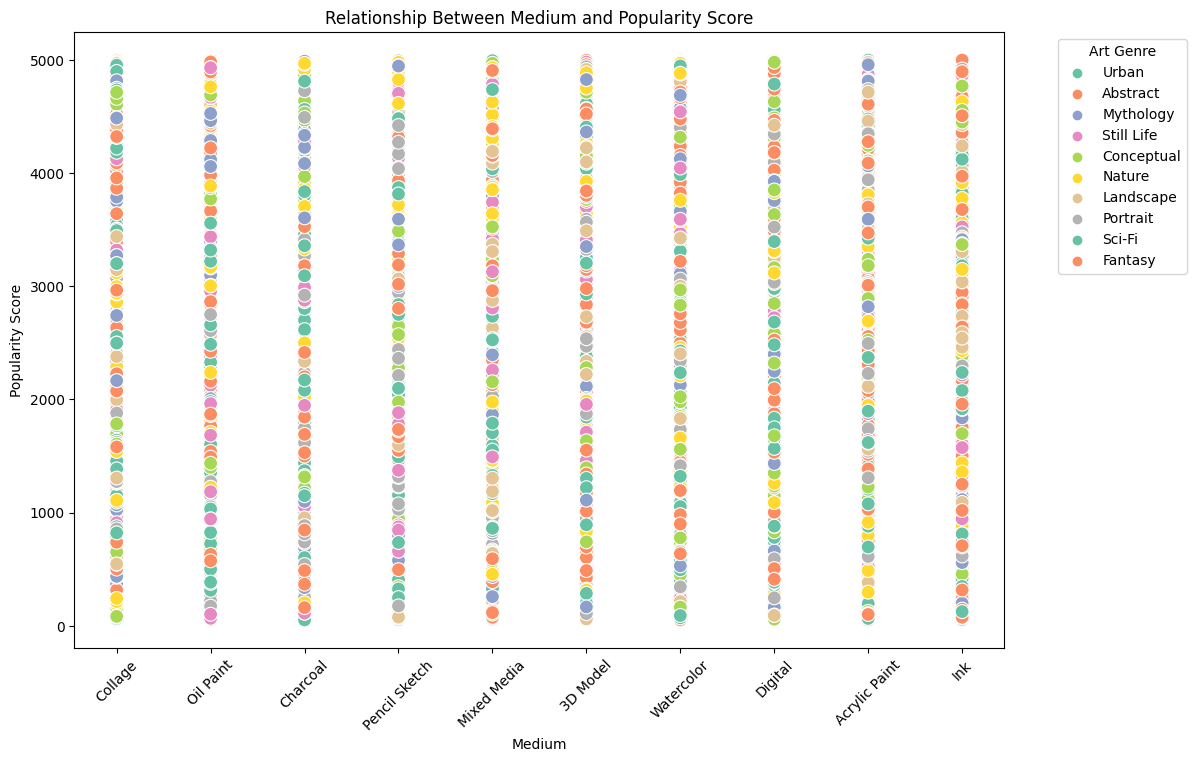

In [34]:
import seaborn as sns

# Scatter plot showing the relationship between Medium and Popularity Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Medium', y='Popularity_Score', data=df_no_outliers, hue='Art_Genre', palette='Set2', s=100)
plt.title('Relationship Between Medium and Popularity Score')
plt.xlabel('Medium')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.legend(title='Art Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**How Does the Number of Artworks Vary by Platform Over Time?**

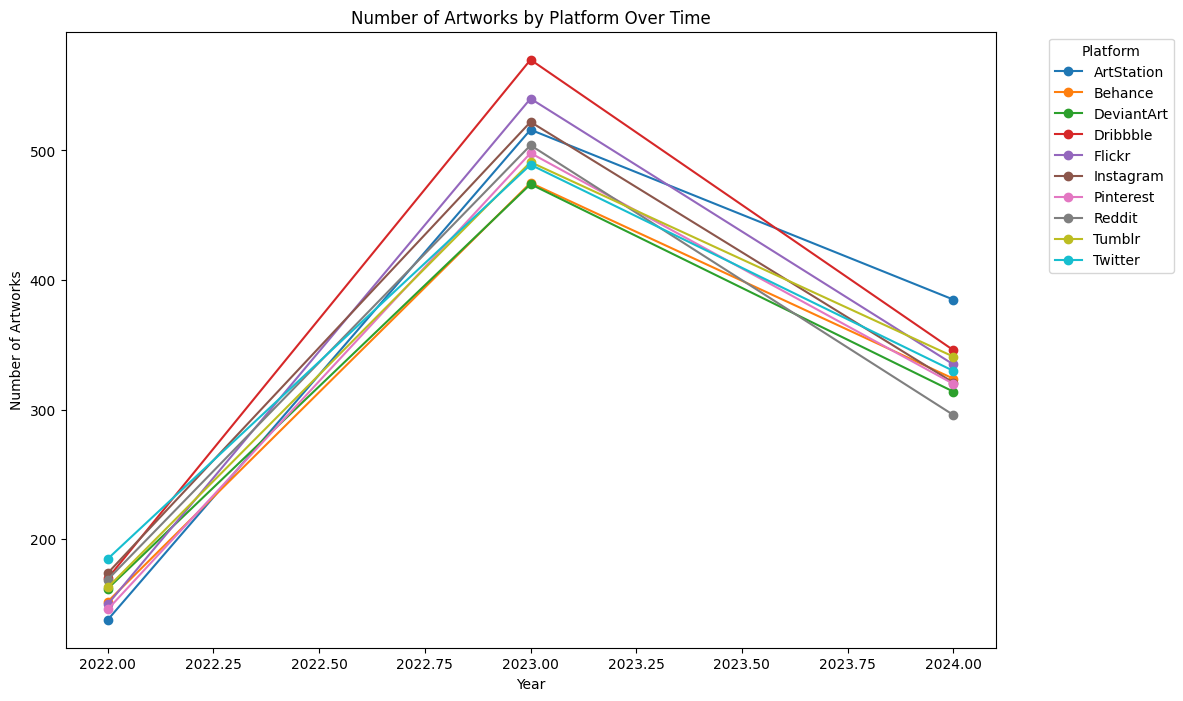

In [35]:
# Grouping data by Creation Year and Platform
platform_time_series = df_no_outliers.groupby(['Creation_Year', 'Platform']).size().unstack().fillna(0)

# Line plot showing the trend of artworks created on different platforms over time
platform_time_series.plot(figsize=(12, 8), marker='o')
plt.title('Number of Artworks by Platform Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Which Tools are Most Commonly Used in Popular Artworks?**

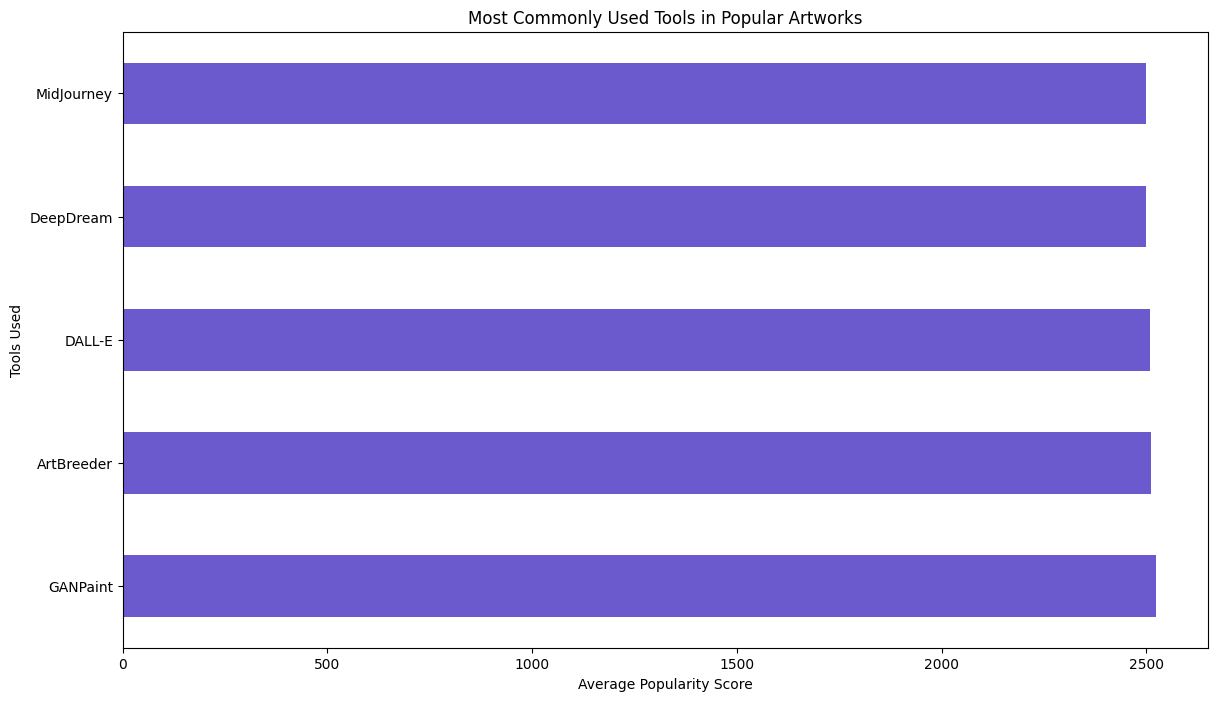

In [36]:
# Grouping data by Tools_Used and calculating the average Popularity Score
tools_popularity = df_no_outliers.groupby('Tools_Used')['Popularity_Score'].mean().sort_values(ascending=False)

# Horizontal bar plot showing the most commonly used tools in popular artworks
plt.figure(figsize=(14, 8))
tools_popularity.plot(kind='barh', color='slateblue')
plt.title('Most Commonly Used Tools in Popular Artworks')
plt.xlabel('Average Popularity Score')
plt.ylabel('Tools Used')
plt.show()

**How Do Different Regions Utilize Various Mediums?**

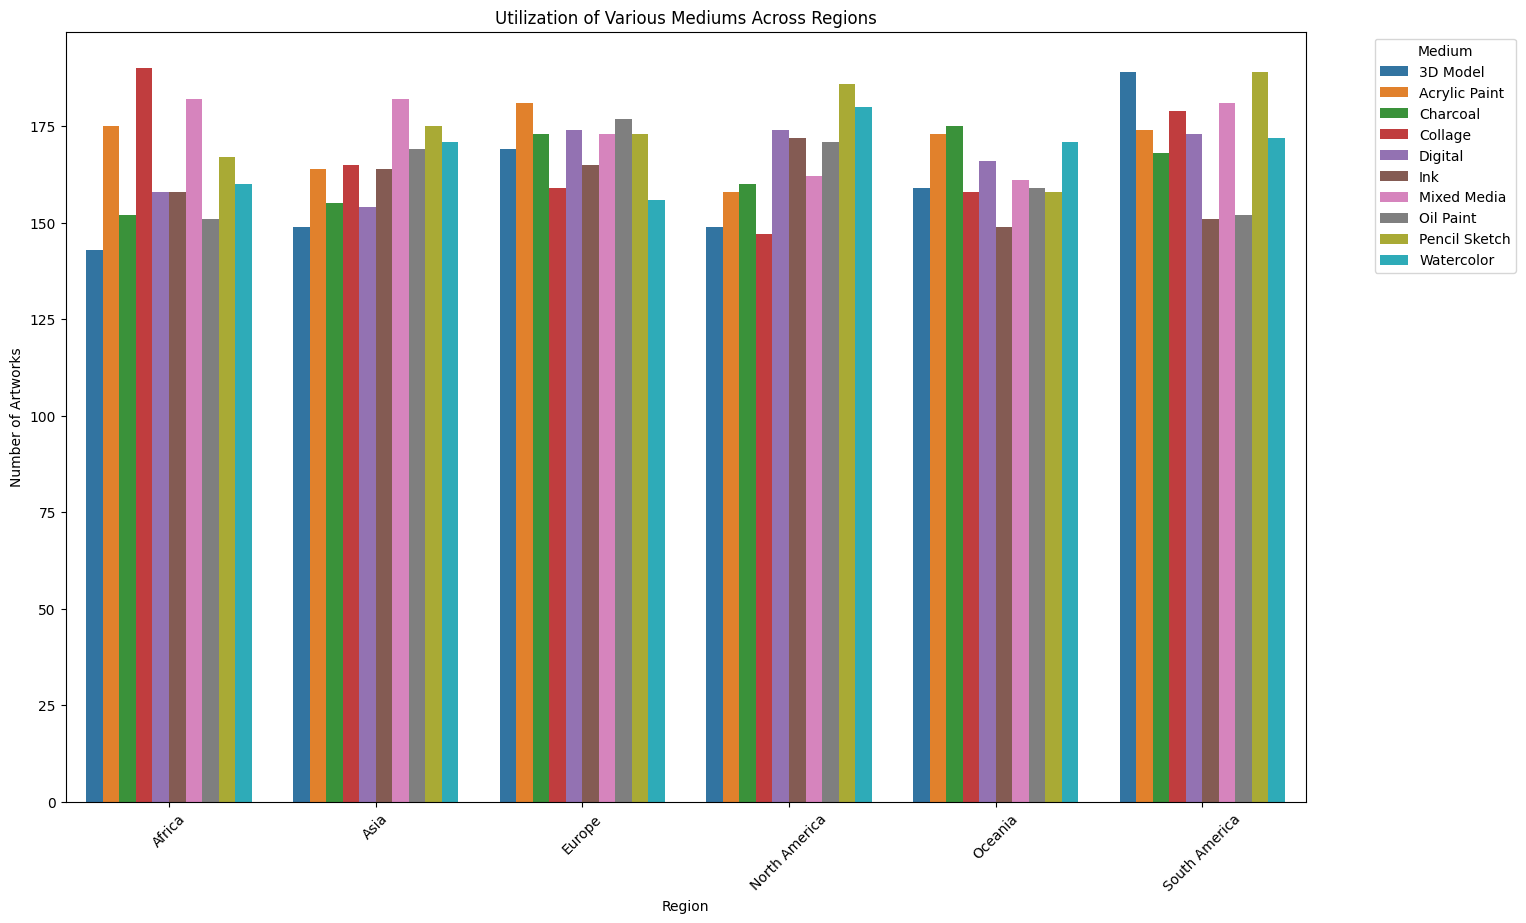

In [37]:
# Grouping data by Region and Medium
region_medium = df_no_outliers.groupby(['Region', 'Medium']).size().reset_index(name='Count')

# Stacked bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x='Region', y='Count', hue='Medium', data=region_medium)
plt.title('Utilization of Various Mediums Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.legend(title='Medium', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**What Are the Most Popular Tools Among Top Artists?**

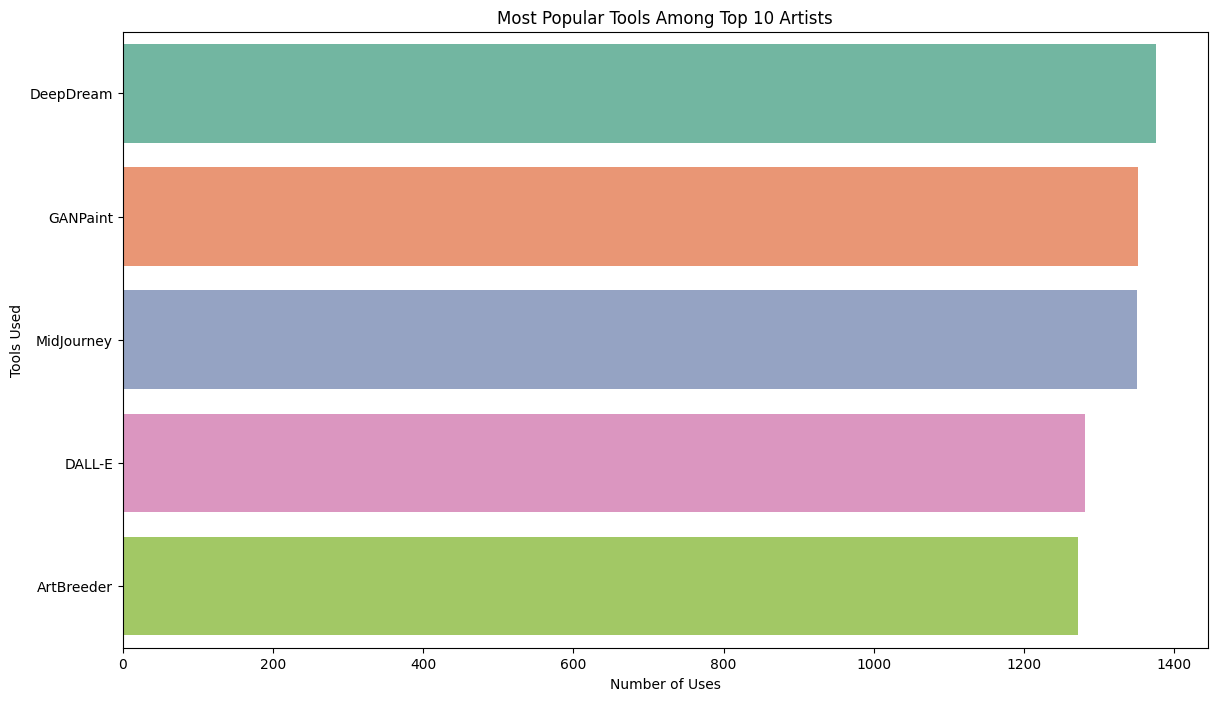

In [38]:
# Selecting top 10 artists based on average Popularity Score
top_artists = df_no_outliers.groupby('Artist_Name')['Popularity_Score'].mean().sort_values(ascending=False).head(10).index

# Filtering data for top artists
top_artists_data = df_no_outliers[df_no_outliers['Artist_Name'].isin(top_artists)]

# Counting tools used by top artists
top_tools = top_artists_data['Tools_Used'].dropna().str.split(',').explode().str.strip().value_counts().head(10).reset_index()
top_tools.columns = ['Tools_Used', 'Count']

# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Tools_Used', data=top_tools, palette='Set2')
plt.title('Most Popular Tools Among Top 10 Artists')
plt.xlabel('Number of Uses')
plt.ylabel('Tools Used')
plt.show()